In [50]:
Link = 'https://github.com/natsunoyuki/blog_posts/blob/main/data_science/Bayesian%20Optimization%20of%20Model%20Hyperparameters.ipynb'

In [51]:
pip install niapy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [52]:
pip install sklearn 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [53]:
pip install sklearn-nature-inspired-algorithms

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [54]:
pip install bayesian-optimization

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [55]:
SEED = 1412
Test_Ratio = 0.2

In [56]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

X,y = make_classification(n_samples=10000,n_features=5,n_informative=2,n_classes=2,n_clusters_per_class=1,flip_y=0.2,shuffle=False,random_state=SEED)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = Test_Ratio, random_state = SEED)



In [57]:
from sklearn.ensemble import RandomForestClassifier

def mdl_para_lst_maker():
    lst = []
    for n_estimator in range(50,501,50):
        for criterion in ['gini', 'entropy']:
            for max_feature in ['sqrt', 'log2', None]:
                MyDict = {'n_estimators':[n_estimator], 'criterion':[criterion], 'max_features':[max_feature], 'random_state':[SEED]}
                lst.append(MyDict)
    return lst 
    
mdl_para_lst = mdl_para_lst_maker()

def get_mdl_para(x):
    x = int(x)
    try:
        return mdl_para_lst[x]
    except:
        x = x%len(mdl_para_lst)
        print(f'Yo! X ({x}) for mdl is out of bounds!')
        return mdl_para_lst[x]

FIRE FLY

In [58]:
'''
from niapy.algorithms.basic import FireflyAlgorithm
import numpy as np 

def NIA_FireFly():
    lst = []
    for population_size in range(10,101,10):#10
        for alpha in np.arange(0.10,0.21,0.01):#10
            for beta0 in range(10,101,10):#10
                for gamma in np.arange(0.05,1.01,0.05):#19
                    for theta in np.arange(0.05,1.01,0.05):#19
                        Algo = FireflyAlgorithm()
                        Algo.set_parameters(population_size=population_size, 
                        alpha=alpha, 
                        beta0=beta0, 
                        gamma=gamma, 
                        theta=theta,
                        seed=SEED
                        )
                        lst.append(Algo)
    return lst 

FA_lst = NIA_FireFly()

def get_algo_FA(x):
    x = int(x)
    try:
        return FA_lst[x]
    except:
        print(f'Yo! X ({x}) for algo is out of bounds!')
        x = x%(len(FA_lst))
        return FA_lst[x]
'''

"\nfrom niapy.algorithms.basic import FireflyAlgorithm\nimport numpy as np \n\ndef NIA_FireFly():\n    lst = []\n    for population_size in range(10,101,10):#10\n        for alpha in np.arange(0.10,0.21,0.01):#10\n            for beta0 in range(10,101,10):#10\n                for gamma in np.arange(0.05,1.01,0.05):#19\n                    for theta in np.arange(0.05,1.01,0.05):#19\n                        Algo = FireflyAlgorithm()\n                        Algo.set_parameters(population_size=population_size, \n                        alpha=alpha, \n                        beta0=beta0, \n                        gamma=gamma, \n                        theta=theta,\n                        seed=SEED\n                        )\n                        lst.append(Algo)\n    return lst \n\nFA_lst = NIA_FireFly()\n\ndef get_algo_FA(x):\n    x = int(x)\n    try:\n        return FA_lst[x]\n    except:\n        print(f'Yo! X ({x}) for algo is out of bounds!')\n        x = x%(len(FA_lst))\n        

In [59]:
'''
from sklearn_nature_inspired_algorithms.model_selection import NatureInspiredSearchCV

Dict_combo_FA = dict()

def Get_Score_FA(mdl_val,algo_val):
    print(mdl_val,algo_val)
    mdl_val = int(mdl_val)
    algo_val = int(algo_val)
    print(mdl_val,algo_val)
    
    combo_str = f'{mdl_val}_{algo_val}'
    if combo_str in Dict_combo_FA:
        return Dict_combo_FA[combo_str]

    param_grid = get_mdl_para(mdl_val)

    algorithm = get_algo_FA(algo_val)

    nia_search_mdl = NatureInspiredSearchCV(
        estimator=RandomForestClassifier(),
        param_grid=param_grid,
        algorithm=algorithm,
        runs=1
    )
    nia_search_mdl.fit(X_train, y_train)
    val = nia_search_mdl.score(X_test,y_test)
    Dict_combo_FA[combo_str] = val 
    return val 
'''

"\nfrom sklearn_nature_inspired_algorithms.model_selection import NatureInspiredSearchCV\n\nDict_combo_FA = dict()\n\ndef Get_Score_FA(mdl_val,algo_val):\n    print(mdl_val,algo_val)\n    mdl_val = int(mdl_val)\n    algo_val = int(algo_val)\n    print(mdl_val,algo_val)\n    \n    combo_str = f'{mdl_val}_{algo_val}'\n    if combo_str in Dict_combo_FA:\n        return Dict_combo_FA[combo_str]\n\n    param_grid = get_mdl_para(mdl_val)\n\n    algorithm = get_algo_FA(algo_val)\n\n    nia_search_mdl = NatureInspiredSearchCV(\n        estimator=RandomForestClassifier(),\n        param_grid=param_grid,\n        algorithm=algorithm,\n        runs=1\n    )\n    nia_search_mdl.fit(X_train, y_train)\n    val = nia_search_mdl.score(X_test,y_test)\n    Dict_combo_FA[combo_str] = val \n    return val \n"

FIRE FLY

HYBRID BAT

In [60]:
from niapy.algorithms.modified import HybridBatAlgorithm
#from niapy.algorithms.basic.de import cross_rand1, cross_rand2, cross_best2, cross_best1, cross_curr2rand1, cross_curr2best1, multi_mutations, proportional, linear, bilinear
import numpy as np 
#set_parameters(self, differential_weight=0.50, crossover_probability=0.90, strategy=cross_best1)
#['cross_rand1', 'cross_rand2', 'cross_best2', 'cross_best1', 'cross_best2', 'cross_curr2rand1', 'cross_curr2best1', 'multi_mutations', 'proportional', 'linear', 'bilinear']
def NIA_HBA():
    lst = []
    for df in np.arange(0.10,.91,.10):
      for cp in np.arange(0.10,.91,.10):
        #for sc in [cross_rand1, cross_best2, cross_curr2rand1, cross_curr2best1, multi_mutations, proportional, linear]:
        Algo = HybridBatAlgorithm()
        Algo.set_parameters(differential_weight=df, crossover_probability=cp)#, strategy=sc)
        lst.append(Algo)

    return lst 

HBA_lst = NIA_HBA()

def get_algo_HBA(x):
    x = int(x)
    try:
        return HBA_lst[x]
    except:
        print(f'Yo! X ({x}) for algo is out of bounds!')
        x = x%(len(HBA_lst))
        return HBA_lst[x]

In [61]:
from sklearn_nature_inspired_algorithms.model_selection import NatureInspiredSearchCV

Dict_combo_HBA = dict()

def Get_Score_HBA(mdl_val,algo_val):
    print(mdl_val,algo_val)
    mdl_val = int(mdl_val)
    algo_val = int(algo_val)
    print(mdl_val,algo_val)
    
    combo_str = f'{mdl_val}_{algo_val}'
    if combo_str in Dict_combo_HBA:
        return Dict_combo_HBA[combo_str]

    param_grid = get_mdl_para(mdl_val)

    algorithm = get_algo_HBA(algo_val)

    nia_search_mdl = NatureInspiredSearchCV(
        estimator=RandomForestClassifier(),
        param_grid=param_grid,
        algorithm=algorithm,
        runs=1
    )
    nia_search_mdl.fit(X_train, y_train)
    val = nia_search_mdl.score(X_test,y_test)
    Dict_combo_HBA[combo_str] = val 
    return val 


HYBRID BAT

In [62]:
19*19*1000 * 100*3*3

324900000

In [63]:
324900000*6 ,32490000, (32490000/60), (32490000/60)/24, ((32490000/60)/24)/365 

(1949400000, 32490000, 541500.0, 22562.5, 61.81506849315068)

In [64]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
val = clf.score(X_test,y_test)
print(val)

0.8625


In [65]:
from bayes_opt import BayesianOptimization, UtilityFunction

# Define the metric to optimize over.
'''
def black_box_function(algo,mdl):
    return Get_Score(mdl,algo)
''' 

# Set range of C to optimize over. bayes_opt requires this to be a dictionary.
pbounds = {"algo_val": (0, len(HBA_lst)-1), "mdl_val" : (0,len(mdl_para_lst)-1)}
print(pbounds)
#ptypes = {"algo_val": int, "mdl_val": int}

# Create BayesianOptimization object, and optimize (maximize) black_box_function.
optimizer = BayesianOptimization(f = Get_Score_HBA, pbounds = pbounds, verbose = 2, random_state = SEED)

optimizer.maximize(init_points = 51, n_iter = 71)

print("Best result: {}; f(x) = {}.".format(optimizer.max["params"], optimizer.max["target"]))

{'algo_val': (0, 80), 'mdl_val': (0, 59)}
|   iter    |  target   | algo_val  |  mdl_val  |
-------------------------------------------------
44.37312093390081 70.37946230774946
44 70
Fitting at most 1 candidates
Optimization finished, 1 candidates were fitted
| 1         | 0.8605    | 70.38     | 44.37     |
25.916042978878316 5.1031562716486345
25 5
Fitting at most 1 candidates
Optimization finished, 1 candidates were fitted
| 2         | 0.862     | 5.103     | 25.92     |
44.89426287782875 25.599141270514192
44 25
Fitting at most 1 candidates
Optimization finished, 1 candidates were fitted
| 3         | 0.8605    | 25.6      | 44.89     |
51.867185895021436 73.7138103882092
51 73
Fitting at most 1 candidates
Optimization finished, 1 candidates were fitted
| 4         | 0.863     | 73.71     | 51.87     |
32.79692004623707 31.258081516566463
32 31
Fitting at most 1 candidates
Optimization finished, 1 candidates were fitted
| 5         | 0.861     | 31.26     | 32.8      |
23.5303563

In [66]:
# Create optimizer and utility function objects.
optimizer = BayesianOptimization(f = None, pbounds = {"algo_val": (0, len(HBA_lst)-1), "mdl_val" : (0,len(mdl_para_lst)-1)}, verbose = 2, random_state = SEED)
utility = UtilityFunction(kind = "ucb", kappa = 1.96, xi = 0.01)

# Optimization for loop.
for i in range(15):
    # Get optimizer to suggest a new parameter value to try.
    next_point = optimizer.suggest(utility)    
    # Evaluate the output of the black_box_function using the new parameter value.
    target = Get_Score_HBA(**next_point)
    try:
        # Update the optimizer with the evaluation results. This needs to be in try-except
        # to prevent repeat errors from occuring.
        optimizer.register(params = next_point, target = target)
    except:
        pass
    
print("Best result: {}; f(x) = {:.3f}.".format(optimizer.max["params"], optimizer.max["target"]))

44.37312093390081 70.37946230774946
44 70
53.406825583377625 60.27898563190991
53 60
Fitting at most 1 candidates
Optimization finished, 1 candidates were fitted
36.00911275665642 51.340502150259226
36 51
Fitting at most 1 candidates
Optimization finished, 1 candidates were fitted
2.8893087878744073 9.566953701936463
2 9
Fitting at most 1 candidates
Optimization finished, 1 candidates were fitted
24.56464016697844 51.78317559617171
24 51
Fitting at most 1 candidates
Optimization finished, 1 candidates were fitted
55.150689482497086 58.351221377144704
55 58
Fitting at most 1 candidates
Optimization finished, 1 candidates were fitted
55.74085486541742 64.72122326657288
55 64
Fitting at most 1 candidates
Optimization finished, 1 candidates were fitted
48.2807898840228 58.192236985592196
48 58
Fitting at most 1 candidates
Optimization finished, 1 candidates were fitted
23.833567096496232 44.586539613449936
23 44
Fitting at most 1 candidates
Optimization finished, 1 candidates were fitted
2

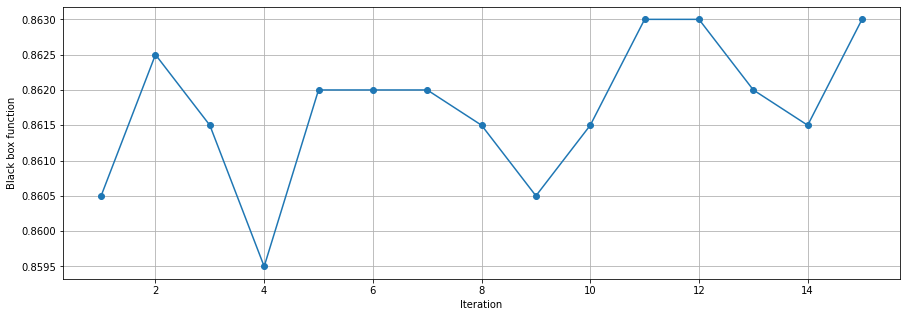

In [67]:
import matplotlib.pyplot as plt

plt.figure(figsize = (15, 5))
plt.plot(range(1, 1+len(optimizer.space.target)), optimizer.space.target, "-o")
plt.grid(True)
plt.xlabel("Iteration")
plt.ylabel("Black box function")
plt.show()

NEED TO BE CHECKED BEFORE RUNNING

In [68]:
import skopt

# Unlike bayes_opt, skopt requires that the search boundary is given as an array of tuples.
p_bounds = [(0.1, 10.0)]

opt = skopt.Optimizer(dimensions = p_bounds,
                base_estimator = "GP", # Gaussian Process regressor.
                n_initial_points = 5, 
                initial_point_generator = 'random', 
                acq_func = "LCB", # Lower Confidence Bounds.
                random_state = 0)

for i in range(15):
    next_point_to_try = opt.ask() # next_point is returned as a list.
    # Unlike bayes_opt, skopt performs minimization. Therefore we use -black_box_function(*next_point).
    loss_to_minimize = -Get_Score(*next_point_to_try)
    result = opt.tell(next_point_to_try, loss_to_minimize)
    
# Again, don't forget to use the negative of result as we are performing minimization here.
print("Best result: {}, f(x) = {:.3f}.".format(result["x"], -result["fun"]))

ModuleNotFoundError: ignored

In [ ]:
plt.figure(figsize = (15, 5))
plt.plot(range(1, len(result["func_vals"])+1), result["func_vals"], "-o")
plt.grid(True)
plt.xlabel("iteration")
plt.ylabel("loss_function")
plt.show()

function ClickConnect(){

console.log("Working"); 
document.querySelector("#comments > span").click() 
}
setInterval(ClickConnect,5000)